In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [6]:
dat = pd.read_csv("processed.csv")

# Model Building

In [7]:
x = dat.drop('pha', axis = 1)

scaler = MinMaxScaler(feature_range = (0, 1))
xresc = scaler.fit_transform(x)
x = pd.DataFrame(data = xresc, columns = x.columns)

y = dat['pha']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 8)

In [8]:
logreg = LogisticRegression(random_state = 1)
logreg.fit(xtrain, ytrain)
pred = logreg.predict(xtest)

print(f'Training MSE: {round(mean_squared_error(logreg.predict(xtrain), ytrain), 4)}')
print(f'Testing MSE: {round(mean_squared_error(pred, ytest), 4)}')

print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["Not Potentially Hazardous", "Potentially Hazardous"],
                            zero_division = 1))

Training MSE: 0.0021
Testing MSE: 0.0024
                           precision    recall  f1-score   support

Not Potentially Hazardous     1.0000    0.9952    0.9976     13011
    Potentially Hazardous     0.9952    1.0000    0.9976     13182

                 accuracy                         0.9976     26193
                macro avg     0.9976    0.9976    0.9976     26193
             weighted avg     0.9976    0.9976    0.9976     26193



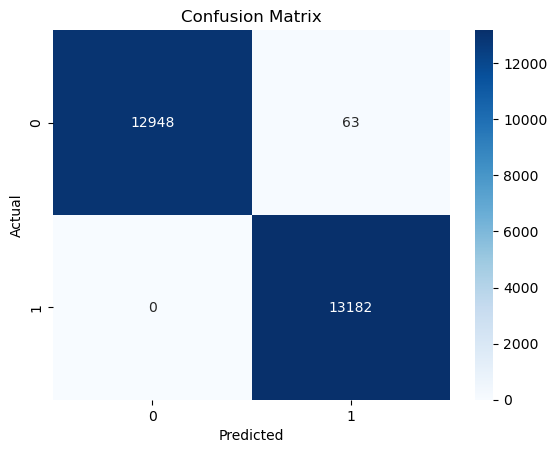

In [9]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()